# 서포트 벡터 머신 (SVM)

In [14]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 선형 SVM 분류



In [15]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

아래 그림에 4장 끝에서 소개한 붓꽃 데이터셋의 일부를 나타냄.

두 클래스가 직선으로 잘 나뉘어져 있음 (선형적으로 구분).

왼쪽으로 그래프에 3개의 선형 분류기에서 만들어진 결정경계가 보임.

|

점선으로 나타난 결정경계를 만든 모델은 클래스를 적절히 분류하지 못함.

다른 두 모델은 훈련세트에 대해 완벽하게 동작. 허나 결정경계가 샘플에 너무 가까워 

새로운 샘플에 대해서는 아마 잘 작동 못할 것.

|

오른쪽 그래프에 있는 실선은 SVM 분류기의 결정경계. 이 직선은 2개의 클래스를 나누고 

있을 뿐만 아니라 제일 가까운 훈련 샘플로부터 가능한 멀리 떨어져 있음.

SVM분류기를 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각가능.

=> 라지 마진 분류

그림 저장: [5-1] large_margin_classification_plot


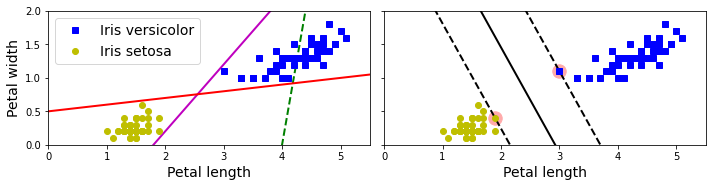

In [16]:
# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("[5-1] large_margin_classification_plot")
plt.show()

도로 바깥쪽에서 훈련 샘플을 더 추가해도 결정경계에는 전혀 영향을 미치지 않음.

도로 경계에 위치한 샘플에 의해 전적으로 결정됨. 이런 샘플 => 서포트 벡터

##### CAUTION

SVM은 특성의 스케일에 민감. 아래 그림의 왼쪽 그래프에서는 수직축의 스케일이 수평축의 스케일보다

훨씬 커서 가장 넓은 도로가 거의 수평에 가깝게 됨. 특성의 스케일을 조정하면(StandardScaler 이용)

결정경계가 훨씬 좋아짐.

그림 저장: [5-2] sensitivity_to_feature_scales_plot


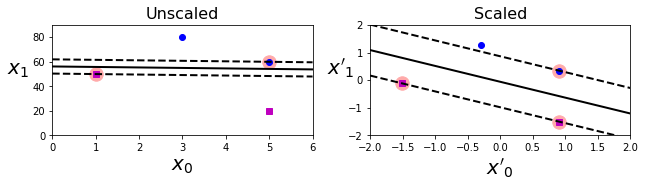

In [17]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("[5-2] sensitivity_to_feature_scales_plot")


### 소프트 마진 분류

모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면 => 하드 마진 분류.

하드 마진 분류에는 2가지 문제점이 있음. 데이터가 선형적으로 구분될 수 있어야 제대로 작동하며,

이상치에 민감. 아래 그림을 보면 데이터셋에 이상치 1개가 존재함.

왼쪽 그래프에서는 하드마진을 찾을 수 없음.

|

빈대로 오른쪽 그래프에서의 결정 경계는 이상치가 없던 [5-1]의 결정경계와 매우 다르고 일반화가 잘될 것 같지 않음.

그림 저장: [5-3] sensitivity_to_outliers_plot


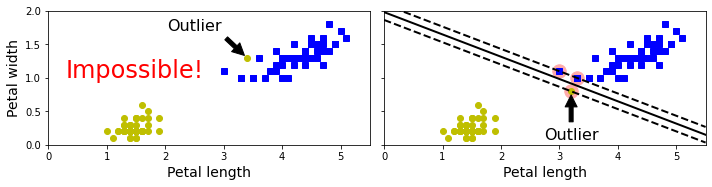

In [18]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("[5-3] sensitivity_to_outliers_plot")
plt.show()

이런 문제를 해결하려면 도로의 폭을 가능한 넓게 유지하는 것과 마진오류

(즉, 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우) 사이에 적절한 균형이 필요

=> 소프트 마진 분류

|

SVM 모델을 만들때 여러 하이퍼파라미터를 지정가능. C는 이런 하이퍼파라미터 중에 하나

이를 낮게 설정하면 [5-4]의 왼쪽 그림과 같은 모델을 만듦.

C값을 높게 설정하면 오른쪽 그래프와 같은 모델을 얻음.

허나, 이 경우 왼쪽모델에 마진 오류가 많지만 일반화가 더 잘 될 듯.

|

아래 사이킷런 코드는 붓꽃 데이터셋을 적재하고, 특성 스케일을 변경하고,

Iris-Virginia 품종을 감지하기 위해 SVM모델을 훈련

(C=1과 잠시 후에 설명할 "힌지 손실" 함수를 적용한 LinearSVC 클래스를 사용함.)

In [21]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [22]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [23]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

그림 저장: [5-4] regularization_plot


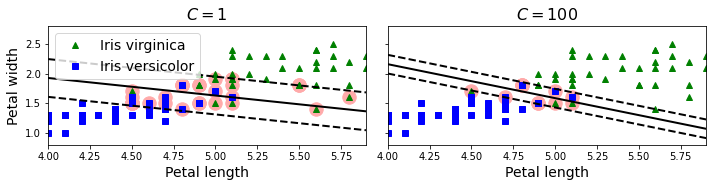

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("[5-4] regularization_plot")

In [26]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

###### NOTE_ SVM 분류기는 로지스틱 회귀 분류기와는 달리 클래스에 대한 확률 제공 없음

LinearSVC 클래스 대신 선형커널을 사용하는 SVC 클래스로 대체 가능.

SVC 모델을 만들 때 SVC(kernel="linear", C=1)라고 씀.

또 다른 방법은 SGDClassifier(loss="hinge", alpha=1(m*C))라고 씀.

|

선형 SVM 분류기를 훈련시키기 위해 (feat. 4장) 일반적인 확률적 경사 하강법을 적용.

LinearSVC만큼 빠르게 수렴하지는 않지만 데이터셋이 아주 커서 메모리에 적재할 수 없거나(외부 메모리 추천)

온라인 학습으로 분류문제를 다룰 때 유용.

##### [TIP]

LinearSVC는 규제에 편향을 포함시킴. 그래서 훈련세트에서 평균을 빼서 중앙에 맞춰야 함.

StandardScaler를 사용하여 데이터 스케일을 맞추면 자동으로 이렇게 됨.

또한 loss 매개변수를 "hinge"로 지정. 마지막으로 훈련샘플보다 특성이 많지 않다면 성능을 높이기 위해

dual 매개변수를 False로 지정.(이 장 뒷부분에 쌍대(duality) 문제에 대해 설명)

## 비선형 SVM 분류

비선형 데이터셋을 다루는 1가지 방법은 (4장처럼) 다항 특성과 같은 특성을 더 추가하는 것.

이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있음.

|

[5-5]의 왼쪽 그래프는 하나의 특성 $x_1$ 만을 가진 간단한 데이터셋을 나타냄.

그림에서 볼 수 있듯이 이 데이터셋은 구분 불가능. 하지만 2번째 특성 $x_2 = (x_1)^2$ 을 추가하여

만들어진 2차원 데이터셋은 완벽하게 선형적으로 구분가능

그림 저장: higher_dimensions_plot


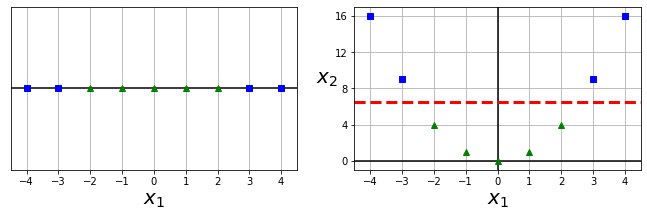

In [27]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("[5-5] higher_dimensions_plot", tight_layout=False)
plt.show()

사이킷런을 사용해 이를 구현하려면(4.3절 '다항회귀'에서 소개한) 

PolynomialFeatures 변환기와 StandardScaler, LinearSVC를 연결하여 Pipline을 만듦.

이를 moons 데이터셋에 적용해보겠습니다. 이 데이터셋은 마주보는 2개의 반원 모양으로

데이터 포인트가 놓여 있는 이진분류를 위한 작은 데이터셋임.

make_moons() 을 사용해 데이터셋을 만들수 있음.

In [29]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

그림 저장: moons_polynomial_svc_plot


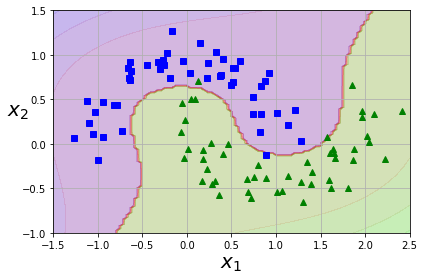

In [31]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("[5-6] moons_polynomial_svc_plot")
plt.show()

### 다항식 커널

다항식 특성을 추가하는 것은 간단하고 모든 알고리즘에서 잘 작동하나

낮은 차수의 다항식은 복잡한 데이터셋을 잘 표현 못하고, 

높은 차수의 다항식은 많은 특성의 추가로 모델을 느리게 만듦.

다행히도 SVM을 사용할 땐 커널 트릭이라는 거의 기적에 가까운 수학적 기교를 적용할 수 있음.

(잠시후 설명)

커널 트릭은 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있음.

사실 어떤 특성도 추가하지 않기에 엄청난 수의 특성 조합이 생기지 않음.

이 기법은 SVC 파이썬 클래스에 구현되어 있음. moons 데이터셋으로 테스트해보겠습니다.

In [32]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

위 코드는 3차 다항식 커널을 사용해 SVM 분류기를 훈련시킴.

결과는 [5-7]의 왼쪽에 나타나 있음. 오른쪽 그래프는 10차 다항식 커널을 사용한 또 다른 SVM 분류기.

모델이 과대적합일 경우 차수를 줄여야 함. 반대로 과소적합이면 차수를 늘려야 함.

매개변수 coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향 받을지 조절

##### TIP

적절한 하이퍼파라미터를 찾는 일반적인 방법은(2장에서 처럼) 그리드탐색 사용.

처음에는 그리드폭을 크게하여 빠르게 검색, 그 다음에는 최적의 값을 찾기 위해 그리드를 세밀하게 탐색.

하이퍼파라미터의 역할을 잘 알고 있으면 파라미터 공간에서 올바른 지역을 탐색하는데 도움됨.

In [33]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

그림 저장: moons_kernelized_polynomial_svc_plot


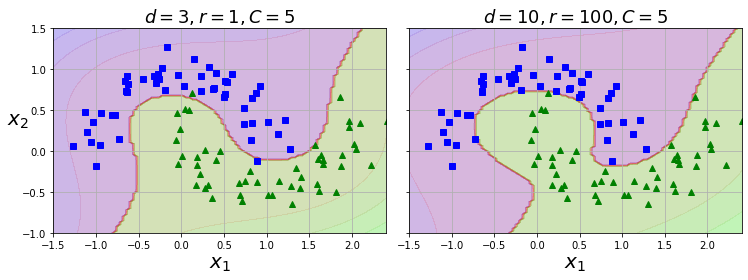

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("[5-7] moons_kernelized_polynomial_svc_plot")
plt.show()

### 유사도 특성

비선형 특성을 다루는 또 다른 기법은 각 샘플이 랜드마크와 얼마나 닮았는지 측정하는

유사도함수로 계산한 특성추가

|

**Equation 5-1: Gaussian RBF**

$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$

|

위 함수의 값은 0(랜드마크에서 아주 멀음) ~ 1(랜드마크와 같은 위치) 까지 변화하며 종 모양으로 나타남.

예를 들어 $x_1=-1$ 샘플을 살펴보면, 1번째 랜드마크에서 1만큼 떨어져 있고 2번째 랜드마크에서 2만큼 떨어져 있음.

그러므로 새로 만든 특성 $x_2=\exp(-0.3 \times 1^2) ≈ 0.74$ 와 $x_3=\exp(-0.3 \times 2^2) ≈ 0.30$

오른쪽 그래프는 변환된 데이터셋을 보여줌(원본 특성은 뺌) -> 선형적으로 구분가능

그림 저장: kernel_method_plot


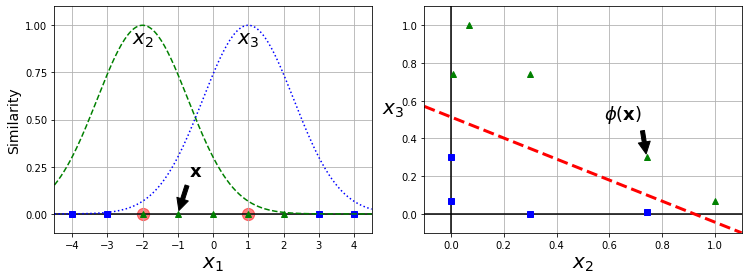

In [35]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

랜드마크를 어떻게 선택하는지 궁금할 것. 간단한 방법은 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정

이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련세트가 선형적으로 구분될 가능성 높음.

단점은 훈련세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환됨.

(원본 특성 제외한다고 가정) 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성 만들어짐.

### 가우시안 RBF 커널

다항 특성 방식과 마찬가지로 유사도 특성 방식도 머신러닝 알고리즘에 유용하게 사용될 수 있음.

추가 특성을 모두 계산하려면 연산 비용이 많이 드는데 특히 훈련세트가 클 경우 더 그러함.

여기에서 커널트릭이 한 번 더 SVM의 마법을 만듦. 

유사도 특성을 많이 추가하는 것과 같은 비슷한 결과 얻을 수 있음.

|

가우시안 RBF 커널을 사용한 SVC 모델을 시도

In [36]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

이 모델이 아래 [5-9]에 나타나 있음. 다른 그래프들은 하이퍼파라미터 gamma($\gamma$) 와 C를 바꿔서 훈련한 모델. 

gamma를 증가시키면 종 모양 그래프가 좁아져 각 샘플의 영향 범위가 줄어듦.

결정경계가 좀 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어짐.

gamma를 감소시키면 종 모양 그래프가 넓어져 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정경계가 좀 더 부드러움.

|

결국 하이퍼파라미터 $\gamma$ 가 규제의 역할을 함. 

모델이 과대적합일 경우엔 감소시켜야하고, 과소적합일 경우엔 증가시켜야 함.(하이퍼파라미터 C와 비슷)

그림 저장: moons_rbf_svc_plot


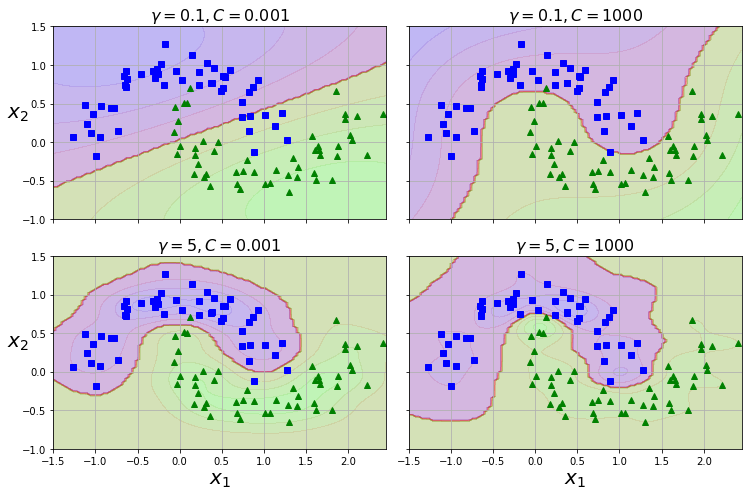

In [38]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("[5-9] moons_rbf_svc_plot")
plt.show()

다른 커널도 있지만 거의 사용되지 않음. 어떤 커널은 특정 데이터 구조에 특화되어 있음.

문자열 커널이 가끔 텍스트 문서나 DNA 서열을 분류할 떄 사용됨.

(문자열 서브시퀀스 커널이나 레벤슈타인 거리 기반의 커널)

##### TIP

여러가지 커널 중 어떤 것을 사용해야 하는가? 경험적으로는 선형커널을 먼저 테스트

(LinearSVC가 SVC(kernel="linear")보다 훨씬 빠르다는 것을 기억해야함)

특히 훈련세트가 아주 크거나 특성 수가 많을 경우에 그러함.

훈련세트가 너무 크지 않다면 가우시안 RBF 커널도 시도해보면 좋음.

대부분의 경우 이 커널이 잘 들어맞음. 특히 훈련데이터의 구조에 특화된 커널이 있다면 커널을 테스트

### 계산 복잡도

LinearSVC 파이썬 클래스는 liblinear 라이브러리에 기반함.

해당 라이브러리는 커널트릭 지원은 안 하지만 훈련 샘플과 특성 수에 거의 선형적, $O(m \times n)$

정밀도를 높인다면 알고리즘 수행시간이 길어짐. 이는 허용오차 하이퍼파라미터 $\mathbf{\epsilon}$ 으로 조절

(사이킷런에서는 매개변수 tol). 대부분 분류 문제는 허용오차를 기본값으로 두는게 잘 작동.

|

SVC는 libsvm 라이브러리를 기반함.

시간복잡도는 $O(m^2 \times n)$ 과 $O(m^3 \times n)$ 사이. 불행히도 이는 훈련샘플 수가 커지면 매우 느려진다는 것.

복잡하지만 작거나 중간규모의 훈련세트에 적합. 특히 희소 특성인 경우에 잘 확장됨.

이 경우 알고리즘 성능이 샘플이 가진 0이 아닌 특성의 평균의 수에 거의 비례.

## SVM 회귀

SVM 알고리즘은 다목적임. 선형, 비선형 분류 뿐만 아니라 선형, 비선형 회귀에도 사용가능.

회귀에 사용하기 위해선 목표를 반대로 하는 것.

일정한 마진오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, SVM 회귀는

제한된 마진오류(즉, 도로 밖 샘플) 내에서 도로 내에 가능한 한 많은 샘플이 들어가도록 학습.

|

도로의 폭은 하이퍼파라미터 $\mathbf{\epsilon}$ 으로 조절함.

[5-10]은 무작위로 생성한 선형 데이터셋에 훈련시킨 2개의 선형 SVM회귀 모델을 보여줌.

하나는 마진을 크게($\mathbf{\epsilon}$ = 1.5) 하고 다른 하나는 마진을 작게 ($\mathbf{\epsilon}$ = 0.5) 만듦.



In [66]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

마진 안에서는 훈련샘플이 추가되어도 모델 예측에는 영향이 없음.

그래서 이 모델을 $\mathbf{\epsilon}$ 에 민감하지 않다고 말함.

|

사이킷런의 LinearSVR을 사용해 선형 SVM 회귀를 적용해봅시다.

In [67]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=42)

In [68]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

그림 저장: [5-10] svm_regression_plot


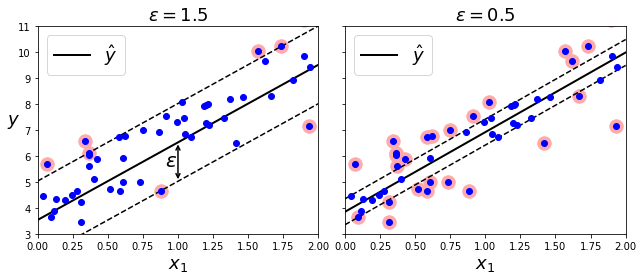

In [69]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("[5-10] svm_regression_plot")
plt.show()

비선형 회귀 작업을 처리하려면 커널 SVM모델을 사용함. [5-11]은 임의의 2차방정식 형태의 훈련세트에

2차 다항커널을 사용한 SVM 회귀를 보여줌. 

왼쪽 그래프는 규제가 거의 없고(즉, 아주 큰 C)

오른쪽 그래프는 규제가 훨씬 많음(즉, 작은 C)

In [70]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [71]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

그림 저장: [5-11] svm_with_polynomial_kernel_plot


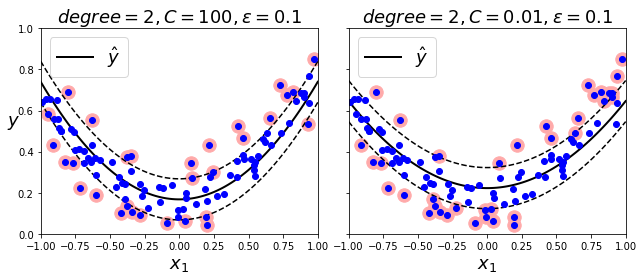

In [72]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("[5-11] svm_with_polynomial_kernel_plot")
plt.show()

SVR은 SVC의 회귀 버전이고 LinearSVR은 LinearSVC의 회귀버전.

LinearSVR은 (LinearSVC처럼) 필요한 시간이 훈련세트의 크기에 비례해서 선형적으로 늘어남.

하지만 SVR은 (SVC처럼) 훈련세트가 커지면 훨씬 느려짐.

##### TIP

SVM을 이상치 탐지에도 사용가능. 자세한 내용은 문서 참조( https://goo.gl/cqU71e)